## Text Analysis - LDA 2
### Create Topic category using topic modelling 



In [1]:
# Importing modules
import pandas as pd
import numpy as np

# Regular Expressions - lets us prcicely manipulate strings
import re

# Let's use create a Word Cloud visualisation
from wordcloud import WordCloud

# An NLP library
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Natural language toolkit - another NLP library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
import io
import pandas as pd


# Print results nicely
from pprint import pprint

# Visulalisation library for our LDA analysis
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# If you want to save the visualisation data
import pickle 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aad.sray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre-processing Data

In [3]:
df = pd.read_csv('db2023_cleandf.csv')

df['ID'] = range(1, 480)

# Display the DataFrame
print(df)

                                               Comment                 Time  \
0    Posting a bit early so people know where to go...  2023-10-10 11:14:12   
1    20% fare reduction on public transport continu...  2023-10-10 13:55:05   
2                                        This is good.  2023-10-10 14:16:50   
3       Aaaaaahhhhh, what have the Greens done for us!  2023-10-10 16:56:05   
4    €67 million to provide 16,000 craft apprentice...  2023-10-10 14:18:04   
..                                                 ...                  ...   
474                                          [deleted]  2023-10-10 13:30:20   
475                                        You did not  2023-10-10 13:31:29   
476  Whats the 18 year old minimum wage rate going to?  2023-10-10 15:30:22   
477                                      10.16 I'd say  2023-10-10 15:33:48   
478  Yeah forgot its a set rate of 80% of minimum w...  2023-10-10 15:52:32   

     Score   ID  
0        1    1  
1       39    2

In [4]:
df.drop(columns=['Time', 'Score'], inplace=True)

# Display the DataFrame after dropping the 'Time' and 'Score' columns
print("\nDataFrame after dropping 'Time' and 'Score' columns:")
print(df)


DataFrame after dropping 'Time' and 'Score' columns:
                                               Comment   ID
0    Posting a bit early so people know where to go...    1
1    20% fare reduction on public transport continu...    2
2                                        This is good.    3
3       Aaaaaahhhhh, what have the Greens done for us!    4
4    €67 million to provide 16,000 craft apprentice...    5
..                                                 ...  ...
474                                          [deleted]  475
475                                        You did not  476
476  Whats the 18 year old minimum wage rate going to?  477
477                                      10.16 I'd say  478
478  Yeah forgot its a set rate of 80% of minimum w...  479

[479 rows x 2 columns]


In [5]:
df.head()

,Comment,ID
0,Posting a bit early so people know where to go...,1
1,20% fare reduction on public transport continu...,2
2,This is good.,3
3,"Aaaaaahhhhh, what have the Greens done for us!",4
4,"€67 million to provide 16,000 craft apprentice...",5


In [6]:
# Join all the comment text into one long string

long_string = ','.join(df['Comment'])
len(long_string)

63072

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


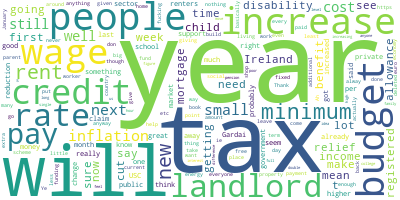

In [7]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [8]:
# Get our stop words, like 'and' and 'on'
stop_words = stopwords.words('english')

In [9]:
# Additional processing 

# Add extra stopwords
stop_words.extend(['still', 'since', 'get', 'want', 'use', 'way', 'stay', 'going', 'stuff', 'yeah', 'ye', 'budget', 'year'])

# Remove Punctuation
df['processsed_text'] = df['Comment'].map(lambda x: re.sub('[,\\.!?]', '', x))

In [10]:
# Helper function to turn our sentences into a list of words
# Yeild means that it returns a generator function ie it won't run all at once, but only as needed
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [11]:
# Helper function to remove stopwords
def remove_stopwords(texts, stopwords=stopwords):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [12]:
# Getting our texts in a list to process
texts = df['Comment'].values.tolist()

In [14]:
words = list(sent_to_words(texts))

In [15]:
words = remove_stopwords(words) 

In [18]:
len(words)

479

In [16]:
words[0]

['posting',
 'bit',
 'early',
 'people',
 'know',
 'go',
 'starts',
 'feel',
 'free',
 'chat',
 'certain',
 'bits',
 'coming',
 'already']

### 3 LDA Hyper Parameters - Alpha, Beta and Number of Topics

In [17]:
# Make a dictionary of ids for the words

id2word = corpora.Dictionary(words)

id2word

In [18]:
# Translates our words into their correspoinding ids

corpus = [id2word.doc2bow(text) for text in words]

In [20]:
# Baased on domain knowledge

num_topics = 15

### Create LDA Model

In [21]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)

In [ ]:
### Word cloud for topics

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



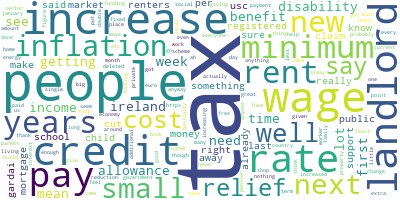

In [24]:
texts = df['processsed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words) 

# Processing for the word cloud 
long_list = []
for text in words:
    long_list.extend(text)
long_list

long_string = ','.join(long_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a bag-of-words representation of the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comment'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
topics = lda.fit_transform(X)

# Assign the dominant topic to each document
df['Topic'] = topics.argmax(axis=1) + 1  # Adding 1 to make topics start from 1

# Display the DataFrame
print(df)


                                               Comment   ID  \
0    Posting a bit early so people know where to go...    1   
1    20% fare reduction on public transport continu...    2   
2                                        This is good.    3   
3       Aaaaaahhhhh, what have the Greens done for us!    4   
4    €67 million to provide 16,000 craft apprentice...    5   
..                                                 ...  ...   
474                                          [deleted]  475   
475                                        You did not  476   
476  Whats the 18 year old minimum wage rate going to?  477   
477                                      10.16 I'd say  478   
478  Yeah forgot its a set rate of 80% of minimum w...  479   

                                       processsed_text  Topic  
0    Posting a bit early so people know where to go...      5  
1    20% fare reduction on public transport continu...      2  
2                                         This is g

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



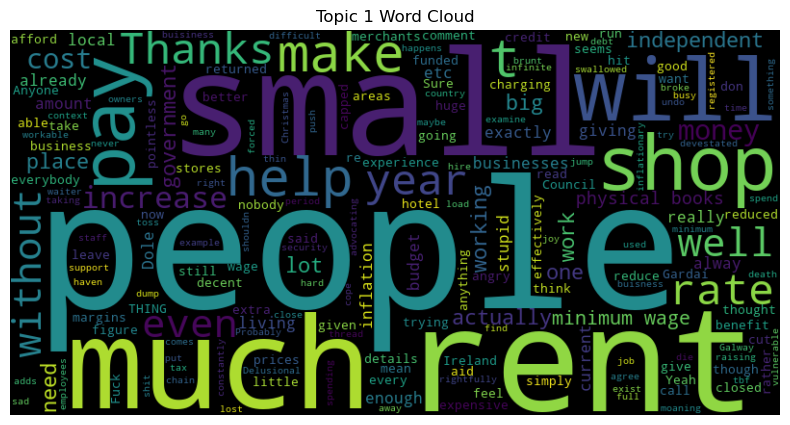

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



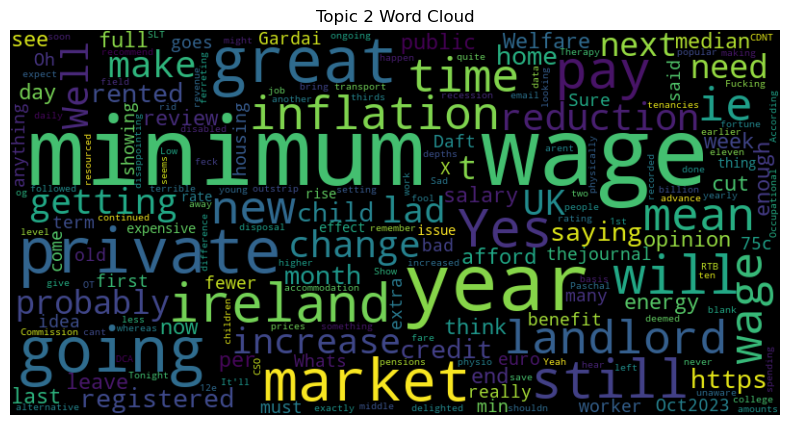

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



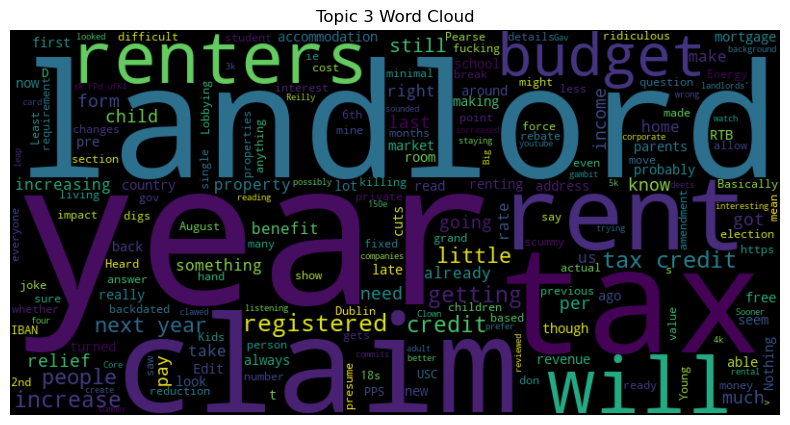

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



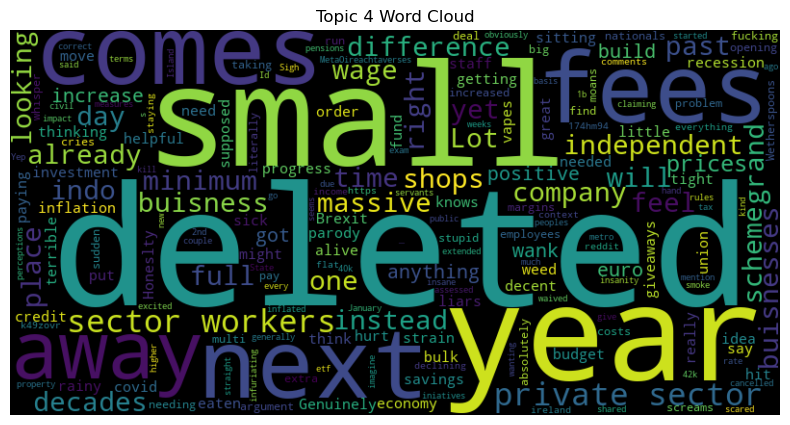

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



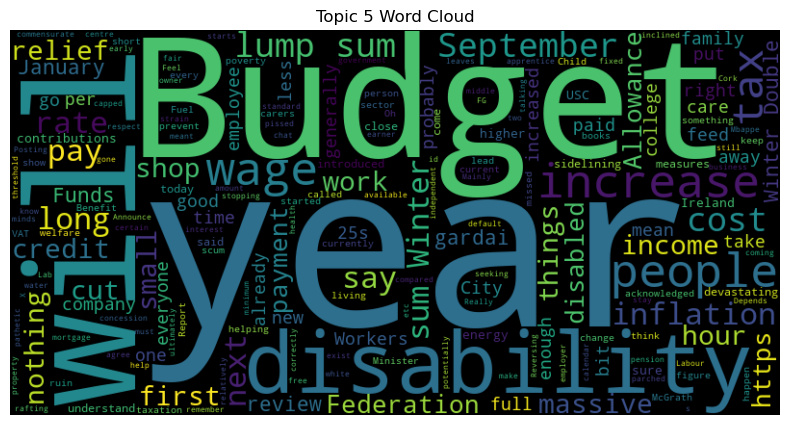

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



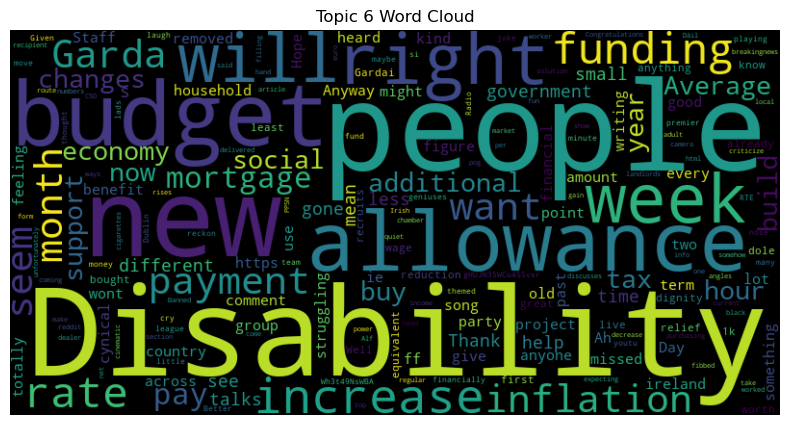

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



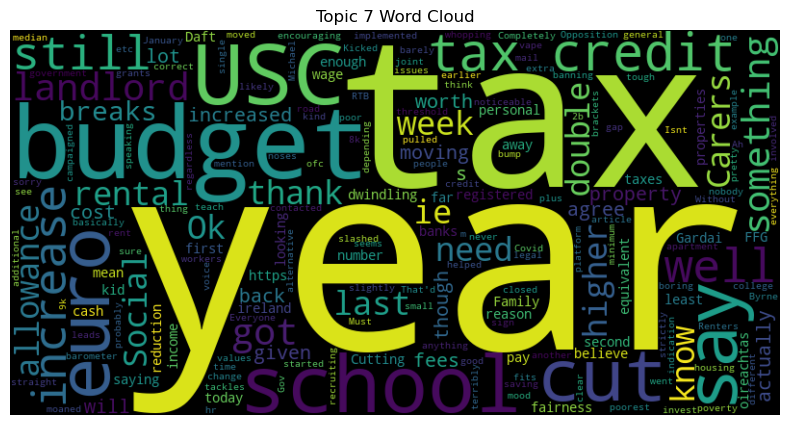

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



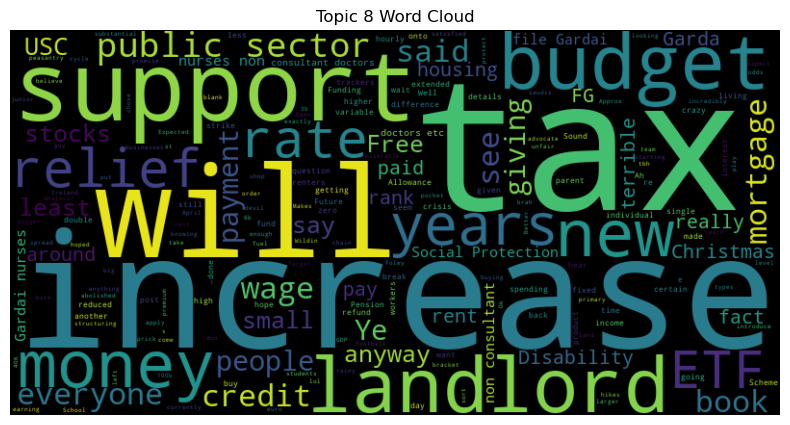

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



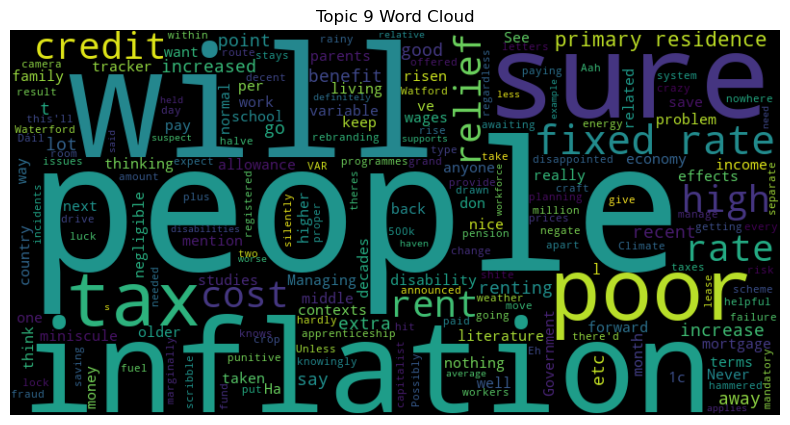

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



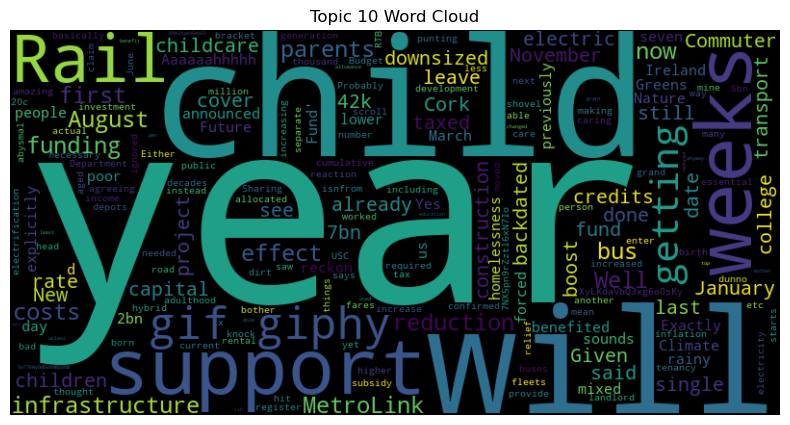

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



ValueError: We need at least 1 word to plot a word cloud, got 0.

In [26]:
from wordcloud import WordCloud

for topic in range(1, 15):  
    words = ' '.join(df[df['Topic'] == topic]['Comment'])
    wordcloud = WordCloud(width=800, height=400).generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic} Word Cloud')
    plt.show()


In [37]:
# Export dataframe to csv to use within dash app cells

df.to_csv('dfplotd.csv', index=False)

In [38]:
# Final Topic Word Cloud Generator



# Call Dash app
app = dash.Dash(__name__)

# Generate word cloud topic
def generate_wordcloud(topic):
    comments = ' '.join(df[df['Topic'] == topic]['Comment'])
    if not comments:
        return None

    # Set style parameters 
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma', collocations=False).generate(comments)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png')
    img_buf.seek(0)
    img_base64 = base64.b64encode(img_buf.read()).decode('utf-8')
    plt.close()
    return f'data:image/png;base64,{img_base64}'

# Layout app
app.layout = html.Div(children=[
    html.H1("Topic Word Cloud Generator"),
    dcc.Dropdown(
        id='topic-dropdown',
        options=[{'label': f'Topic {i}', 'value': i} for i in range(1, 11)],  
        value=1,  
        multi=False
    ),
    html.Div(id='wordcloud-container')
])

# Define Callback 
@app.callback(
    Output('wordcloud-container', 'children'),
    [Input('topic-dropdown', 'value')]
)
def update_wordcloud(selected_topic):
    wordcloud_img = generate_wordcloud(selected_topic)
    if wordcloud_img:
        return html.Img(src=wordcloud_img, style={'width': '80%', 'height': '80%'})
    else:
        return html.Div("No comments available for the selected topic.")

# Run app
if __name__ == '__main__':
    app.run_server(debug=True, port=8055)

;

''

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

